In [1]:
# Dependencies 
import pandas as pd
import matplotlib as plt
from pathlib import Path
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")


In [2]:
# File to Load
file = Path("../Resources/U.S._Chronic_Disease_Indicators.csv")


In [3]:
# Read U.S chronic desease data File and store into Pandas DataFrame
df = pd.read_csv(file, low_memory=True)

# Data Frame chronic disease, 5 first rows 
df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


#Part 1: Exploring and cleaning the data

In [4]:
# Exploring to see all our columns 
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [5]:
# Exploring the whole data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

In [6]:
# Create a boolean series indicating columns with zero non-null values
empty_column_filter_series = df.count() == 0 
# Display the boolean series
empty_column_filter_series

YearStart                    False
YearEnd                      False
LocationAbbr                 False
LocationDesc                 False
DataSource                   False
Topic                        False
Question                     False
Response                      True
DataValueUnit                False
DataValueType                False
DataValue                    False
DataValueAlt                 False
DataValueFootnoteSymbol      False
DataValueFootnote            False
LowConfidenceLimit           False
HighConfidenceLimit          False
StratificationCategory1      False
Stratification1              False
StratificationCategory2       True
Stratification2               True
StratificationCategory3       True
Stratification3               True
Geolocation                  False
LocationID                   False
TopicID                      False
QuestionID                   False
ResponseID                    True
DataValueTypeID              False
StratificationCatego

In [7]:
# Selects the count of non-null values for columns identified as empty by empty_column_filter_series
df.count()[empty_column_filter_series]

Response                     0
StratificationCategory2      0
Stratification2              0
StratificationCategory3      0
Stratification3              0
ResponseID                   0
StratificationCategoryID2    0
StratificationID2            0
StratificationCategoryID3    0
StratificationID3            0
dtype: int64

In [8]:
# Get the names of columns with no data (identified by empty_column_filter_series)
empty_columns = df.count()[empty_column_filter_series].index
# Display empty_columns variable 
empty_columns

Index(['Response', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'ResponseID',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [9]:
# Remove columns with no data (identified by empty_columns) from the DataFrame chronic_df
# inplace=True ensures the changes are made to chronic_df directly
df.drop(columns=empty_columns, inplace=True)

In [10]:
#Now dropping some redundant columns 
df= df.drop(columns=['LocationID','YearEnd','TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'], axis=1)
df.head()

,YearStart,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
1,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,15.9,15.9,NaN,NaN,13.3,18.9,Sex,Female,POINT (144.793731 13.444304)
2,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,%,Crude Prevalence,30.0,30.0,NaN,NaN,26.2,34.0,Sex,Male,POINT (144.793731 13.444304)
3,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
4,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)


In [11]:
chronic_df = df.rename(columns={"YearStart": "Years", "LocationDesc": "Location", })
chronic_df.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
1,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,15.9,15.9,NaN,NaN,13.3,18.9,Sex,Female,POINT (144.793731 13.444304)
2,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,%,Crude Prevalence,30.0,30.0,NaN,NaN,26.2,34.0,Sex,Male,POINT (144.793731 13.444304)
3,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
4,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)


In [12]:
# Print the shape of the DataFrame chronic_df (number of rows, number of columns)
print(chronic_df.shape)
# Print the column names of the DataFrame chronic_df after dropping non-null columns 
chronic_df.columns

(311745, 17)


Index(['Years', 'LocationAbbr', 'Location', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'Geolocation'],
      dtype='object')

In [13]:
# Count occurrences of each year in the "Years" column
# We want to see this result to understand the distribution of data over the years
chronic_df["Years"].value_counts()

Years
2019    88823
2021    87600
2020    67999
2022    47125
2016     8760
2015     8760
2018     2678
Name: count, dtype: int64

In [14]:
# Count instances of each location description grouped by location abbreviation
location_counts = chronic_df.groupby("LocationAbbr")["Location"].value_counts()
location_counts


LocationAbbr  Location            
AK            Alaska                  5737
AL            Alabama                 5794
AR            Arkansas                5794
AZ            Arizona                 5688
CA            California              5647
CO            Colorado                5794
CT            Connecticut             5794
DC            District of Columbia    5794
DE            Delaware                5794
FL            Florida                 5745
GA            Georgia                 5794
GU            Guam                    4015
HI            Hawaii                  5794
IA            Iowa                    5745
ID            Idaho                   5647
IL            Illinois                5794
IN            Indiana                 5647
KS            Kansas                  5794
KY            Kentucky                5745
LA            Louisiana               5794
MA            Massachusetts           5794
MD            Maryland                5745
ME            Maine

In [15]:
# Count the number of unique values in each column of chronic_df
chronic_df.nunique()

Years                          7
LocationAbbr                  55
Location                      55
DataSource                    14
Topic                         19
Question                     109
DataValueUnit                  8
DataValueType                 12
DataValue                  14852
DataValueAlt               14852
DataValueFootnoteSymbol        9
DataValueFootnote              9
LowConfidenceLimit          8412
HighConfidenceLimit         8861
StratificationCategory1        5
Stratification1               26
Geolocation                   54
dtype: int64

In [16]:
# Sorting our locationAbbr provide a better view to analyse this column 
sorted(chronic_df["LocationAbbr"].unique())


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'US',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [17]:
# creating an array with the states without the territories 
states_array = ['AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO',
                'MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI',
                'WV','WY']

In [18]:
# Filter the DataFrame
us_df = chronic_df[chronic_df["LocationAbbr"].isin(states_array)]
#Displaying dataframe 
us_df.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
3,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
4,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
5,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,51.8,NaN,NaN,49.8,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048)
6,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,30.5,NaN,NaN,28.7,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046)


In [19]:
#adding 0 for NaN values in column "DataValue"
us_cleaned_df = us_df.fillna({"DataValue": 0})
us_cleaned_df.head(8)


,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
3,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
4,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
5,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,51.8,NaN,NaN,49.8,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048)
6,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,30.5,NaN,NaN,28.7,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046)
8,2019,WV,West Virginia,NVSS,Health Status,Life expectancy at birth,Years,Number,71.9,71.9,NaN,NaN,71.6,72.2,Sex,Male,POINT (-80.71264013499967 38.66551020200046)
9,2020,AL,Alabama,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,5.0,5.0,NaN,NaN,3.6,6.8,Age,Age 18-44,POINT (-86.63186076199969 32.84057112200048)
10,2020,AK,Alaska,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,20.8,20.8,NaN,NaN,18.1,23.8,Sex,Male,POINT (-147.72205903599973 64.84507995700051)


In [20]:
# Reseting the index for a more aestethic view
us_chronic_df = us_cleaned_df.reset_index(drop=True)
us_chronic_df.head(8)

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,44.0,44.0,NaN,NaN,41.0,47.1,Age,Age >=65,POINT (-83.62758034599966 32.83968109300048)
1,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,11.4,11.4,NaN,NaN,10.2,12.7,Sex,Male,POINT (-68.98503133599962 45.254228894000505)
2,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,Years,Number,78.0,78.0,NaN,NaN,77.8,78.2,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
3,2019,OH,Ohio,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,51.8,51.8,NaN,NaN,49.8,53.7,Age,Age >=65,POINT (-82.40426005599966 40.06021014100048)
4,2019,OK,Oklahoma,BRFSS,Arthritis,Arthritis among adults,%,Crude Prevalence,30.5,30.5,NaN,NaN,28.7,32.3,Sex,Female,POINT (-97.52107021399968 35.47203135600046)
5,2019,WV,West Virginia,NVSS,Health Status,Life expectancy at birth,Years,Number,71.9,71.9,NaN,NaN,71.6,72.2,Sex,Male,POINT (-80.71264013499967 38.66551020200046)
6,2020,AL,Alabama,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,5.0,5.0,NaN,NaN,3.6,6.8,Age,Age 18-44,POINT (-86.63186076199969 32.84057112200048)
7,2020,AK,Alaska,BRFSS,Disability,Adults with any disability,%,Crude Prevalence,20.8,20.8,NaN,NaN,18.1,23.8,Sex,Male,POINT (-147.72205903599973 64.84507995700051)


In [21]:
# Displaying name of columns 
us_chronic_df.columns

Index(['Years', 'LocationAbbr', 'Location', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'Geolocation'],
      dtype='object')

#Part 2 : How has the prevalence of chronic diseases changed from 2015 to 2022, and are there any significant trends or patterns over time?

In [22]:
#selecting the columns we want to work with for this question
chronic_per_year =us_chronic_df[["Years","Location","Topic","DataValueType","DataValue"]]
chronic_per_year

,Years,Location,Topic,DataValueType,DataValue
0,2019,Georgia,Disability,Crude Prevalence,44.0
1,2019,Maine,Diabetes,Crude Prevalence,11.4
2,2019,Nevada,Health Status,Number,78.0
3,2019,Ohio,Arthritis,Crude Prevalence,51.8
4,2019,Oklahoma,Arthritis,Crude Prevalence,30.5
...,...,...,...,...,...
287895,2022,Vermont,Mental Health,Crude Mean,7.2
287896,2022,Virginia,"Nutrition, Physical Activity, and Weight Status",Age-adjusted Prevalence,31.6
287897,2022,Washington,Sleep,Crude Prevalence,25.3
287898,2022,Utah,Immunization,Crude Prevalence,0.0


In [23]:
#transforming our dataframe with Topic and DataValueType as index and transposing the years into columns 
chronic_pivot_df = chronic_per_year.pivot_table(index=['Topic', 'DataValueType'], columns='Years', values='DataValue')
chronic_pivot_df.head(20)

Years                                                    2015         2016  \
Topic     DataValueType                                                      
Alcohol   Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude 75th percentile                           NaN          NaN   
          Crude Median                                    NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
          Per capita alcohol consumption gallons          NaN          NaN   
Arthritis Age-adjusted Prevalence                         NaN          NaN   
          Crude Prevalence                                NaN          NaN   
Asthma    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                               NaN          NaN   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                      NaN          NaN   
          Number                                          NaN          NaN   
Cancer    Age-adjusted Prevalence                         NaN          NaN   
          Age-adjusted Rate                         85.877000    81.541464   
          Crude Prevalence                                NaN          NaN   
          Crude Rate                                91.371429    88.418643   
          Number                                  2788.878571  2721.044286   

Years                                             2018        2019  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  NaN   12.125800   
          Age-adjusted Rate                        NaN    8.062000   
          Crude 75th percentile                    NaN    3.537752   
          Crude Median                             NaN    2.107923   
          Crude Prevalence                         NaN   13.230683   
          Crude Rate                               NaN   11.533692   
          Number                                   NaN  271.016923   
          Per capita alcohol consumption gallons   NaN    2.468000   
Arthritis Age-adjusted Prevalence                  NaN   19.563486   
          Crude Prevalence                         NaN   22.525614   
Asthma    Age-adjusted Prevalence                  NaN    7.367800   
          Age-adjusted Rate                        NaN    0.362600   
          Crude Prevalence                         NaN    7.662500   
          Crude Rate                               NaN    0.511077   
          Number                                   NaN   18.849231   
Cancer    Age-adjusted Prevalence                  NaN         NaN   
          Age-adjusted Rate                        NaN         NaN   
          Crude Prevalence                         NaN         NaN   
          Crude Rate                               NaN         NaN   
          Number                                   NaN         NaN   

Years                                                   2020        2021  \
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                  11.746600   11.650000   
          Age-adjusted Rate                        10.815400   12.772000   
          Crude 75th percentile                     3.568450    3.493876   
          Crude Median                              2.137692    2.119077   
          Crude Prevalence                         11.639846   11.149756   
          Crude Rate                               14.414769   16.569385   
          Number                                  315.876923  346.243077   
          Per capita alcohol consumption gallons    2.5454

In [24]:
# Adding 0 to the Nan Values in the years columns 
chronic_pivot_df.fillna(0, inplace=True)
chronic_pivot_df.head(15)

Years                                             2015  2016  2018  \
Topic     DataValueType                                              
Alcohol   Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude 75th percentile                    0.0   0.0   0.0   
          Crude Median                             0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   
          Per capita alcohol consumption gallons   0.0   0.0   0.0   
Arthritis Age-adjusted Prevalence                  0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
Asthma    Age-adjusted Prevalence                  0.0   0.0   0.0   
          Age-adjusted Rate                        0.0   0.0   0.0   
          Crude Prevalence                         0.0   0.0   0.0   
          Crude Rate                               0.0   0.0   0.0   
          Number                                   0.0   0.0   0.0   

Years                                                   2019        2020  \
Topic     DataValueType                                                    
Alcohol   Age-adjusted Prevalence                  12.125800   11.746600   
          Age-adjusted Rate                         8.062000   10.815400   
          Crude 75th percentile                     3.537752    3.568450   
          Crude Median                              2.107923    2.137692   
          Crude Prevalence                         13.230683   11.639846   
          Crude Rate                               11.533692   14.414769   
          Number                                  271.016923  315.876923   
          Per capita alcohol consumption gallons    2.468000    2.545400   
Arthritis Age-adjusted Prevalence                  19.563486    0.000000   
          Crude Prevalence                         22.525614    0.000000   
Asthma    Age-adjusted Prevalence                   7.367800    7.867400   
          Age-adjusted Rate                         0.362600    0.443800   
          Crude Prevalence                          7.662500    7.946167   
          Crude Rate                                0.511077    0.593538   
          Number                                   18.849231   22.467692   

Years                                                   2021       2022  
Topic     DataValueType                                                  
Alcohol   Age-adjusted Prevalence                  11.650000  12.939800  
          Age-adjusted Rate                        12.772000   0.000000  
          Crude 75th percentile                     3.493876   3.762481  
          Crude Median                              2.119077   2.307846  
          Crude Prevalence                         11.149756  12.651385  
          Crude Rate                               16.569385   0.000000  
          Number                                  346.243077   0.000000  
          Per capita alcohol consumption gallons    2.586000   0.000000  
Arthritis Age-adjusted Prevalence                  18.810800  33.104200  
          Crude Prevalence                         21.618773  36.373538  
Asthma    Age-adjusted Prevalence                   8.250200   7.888800  
          Age-adjusted Rate                         0.351200   0.000000  
          Crude Prevalence                          8.333167   8.235385  
          Crude Rate                                0.464462   0.000000  
          Number                                   18.616923   0.000000

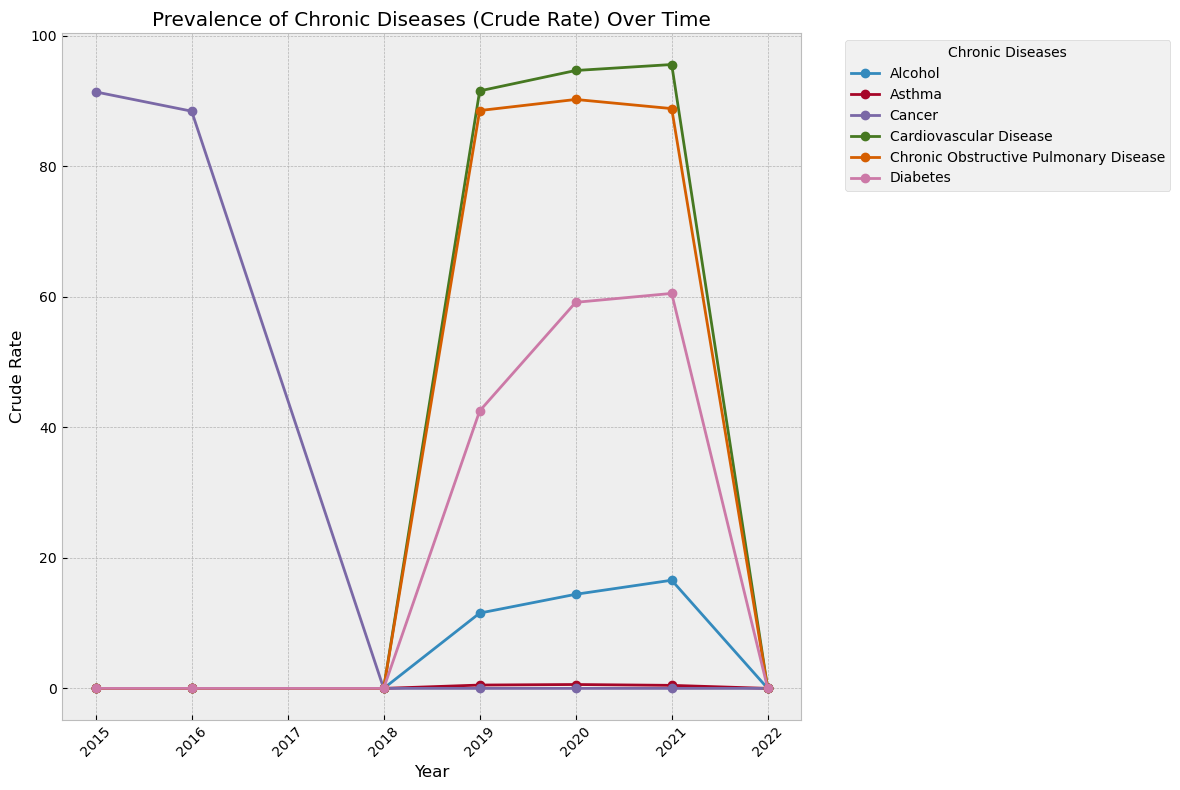

In [25]:

# Filter the DataFrame for 'Crude Rate' data value type
crude_rate_df = chronic_pivot_df.xs('Crude Rate', level='DataValueType')

# Plotting
crude_rate_df.T.plot(figsize=(12, 8), marker='o', linewidth=2)  # Plotting transposed DataFrame with marker style 'o' and linewidth 2

plt.title('Prevalence of Chronic Diseases (Crude Rate) Over Time')  # Setting title of the plot
plt.xlabel('Year')  # Setting label for x-axis
plt.ylabel('Crude Rate')  # Setting label for y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees
plt.legend(title='Chronic Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adding legend with title and adjusting position
plt.grid(True)  # Adding gridlines to the plot
plt.tight_layout()  # Adjusting layout to prevent overlapping elements
plt.savefig("Images/Fig1.png") # Saves Graph to a PNG File
plt.show()  # Displaying the plot

#Part 3 : Among chronic diseases, which specific type is the most prevalent in the population, and has its prevalence changed over time?

In [26]:
#We could answer the question with the mode fucntion first.
most_prevelent_disease = us_chronic_df["Topic"].mode()
most_prevelent_disease = most_prevelent_disease[0]
print(f"Among chronic diseases the most prevelent type in the population is {most_prevelent_disease}")

Among chronic diseases the most prevelent type in the population is Cardiovascular Disease


In [27]:
#Filtering by crude rate, data value type
chronic_cleaned = chronic_pivot_df.loc[(slice(None), "Crude Rate"), :]
#Displaying dataframe
chronic_cleaned

,Years,2015,2016,2018,2019,2020,2021,2022
Topic,DataValueType,,,,,,,
Alcohol,Crude Rate,0.000000,0.000000,0.0,11.533692,14.414769,16.569385,0.0
Asthma,Crude Rate,0.000000,0.000000,0.0,0.511077,0.593538,0.464462,0.0
Cancer,Crude Rate,91.371429,88.418643,0.0,0.000000,0.000000,0.000000,0.0
Cardiovascular Disease,Crude Rate,0.000000,0.000000,0.0,91.525196,94.651196,95.565370,0.0
Chronic Obstructive Pulmonary Disease,Crude Rate,0.000000,0.000000,0.0,88.514840,90.214545,88.814445,0.0
Diabetes,Crude Rate,0.000000,0.000000,0.0,42.505154,59.136000,60.504000,0.0


In [28]:
cleaned_index = chronic_per_year.loc[(chronic_per_year["DataValueType"] == "Crude Rate"),:]

cleaned_index_df = cleaned_index.reset_index(drop=True)
cleaned_index_df.head(10)

,Years,Location,Topic,DataValueType,DataValue
0,2015,Colorado,Cancer,Crude Rate,0.0
1,2016,Idaho,Cancer,Crude Rate,0.0
2,2015,Texas,Cancer,Crude Rate,234.0
3,2015,North Carolina,Cancer,Crude Rate,0.0
4,2016,Louisiana,Cancer,Crude Rate,44.4
5,2016,Mississippi,Cancer,Crude Rate,653.0
6,2015,Virginia,Cancer,Crude Rate,497.3
7,2015,Wisconsin,Cancer,Crude Rate,25.2
8,2015,New York,Cancer,Crude Rate,2.0
9,2015,New York,Cancer,Crude Rate,345.5


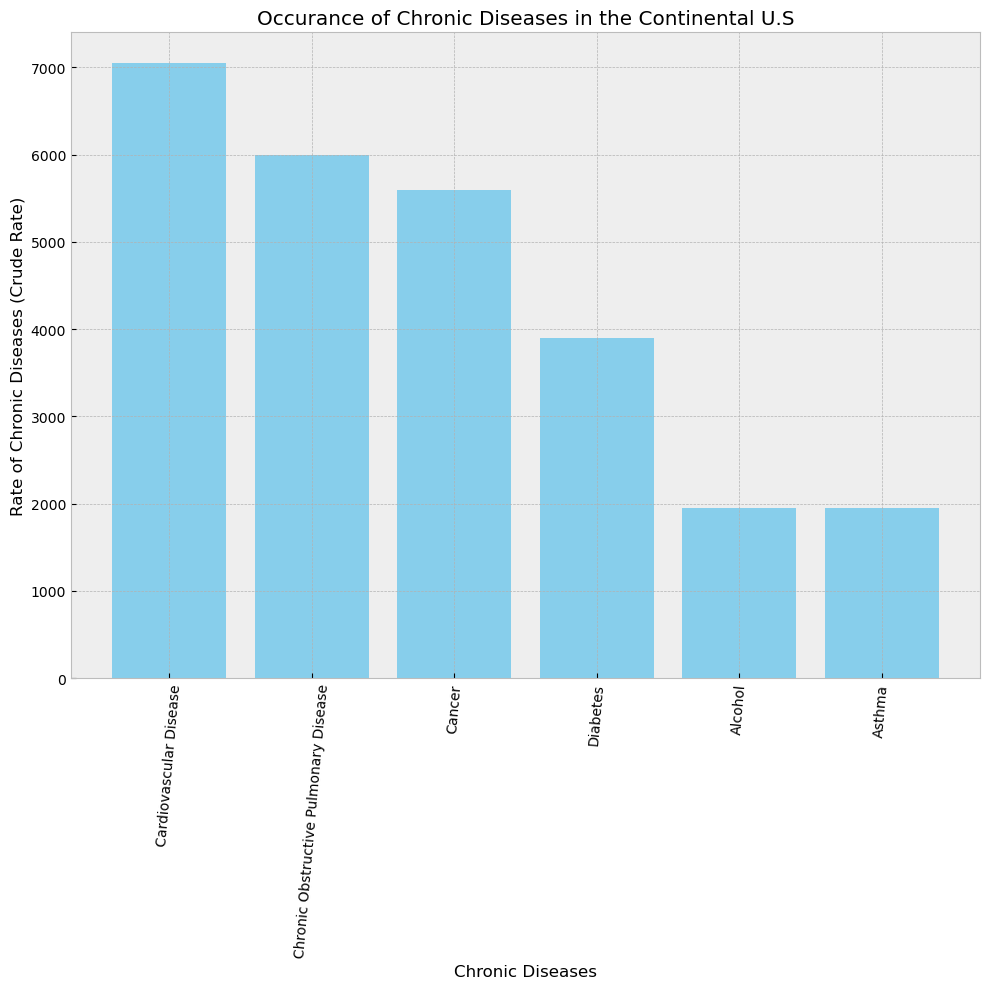

In [70]:
# Generate a bar plot showing the total number of rows (Data Value/Topic) for each chronic disease using pyplot.

# Calculate the total number of rows for each chronic disease
datavalue_topic = cleaned_index_df['Topic'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10,10))  # Adjust figure size if needed
plt.bar(datavalue_topic.index, datavalue_topic.values, color='skyblue',align="center")
plt.xlabel('Chronic Diseases')
plt.ylabel('Rate of Chronic Diseases (Crude Rate)')
plt.title('Occurance of Chronic Diseases in the Continental U.S')
plt.xticks(rotation=85)
plt.tight_layout()
plt.savefig("Images/Fig2.png") # Saves Graph to a PNG File
plt.show()

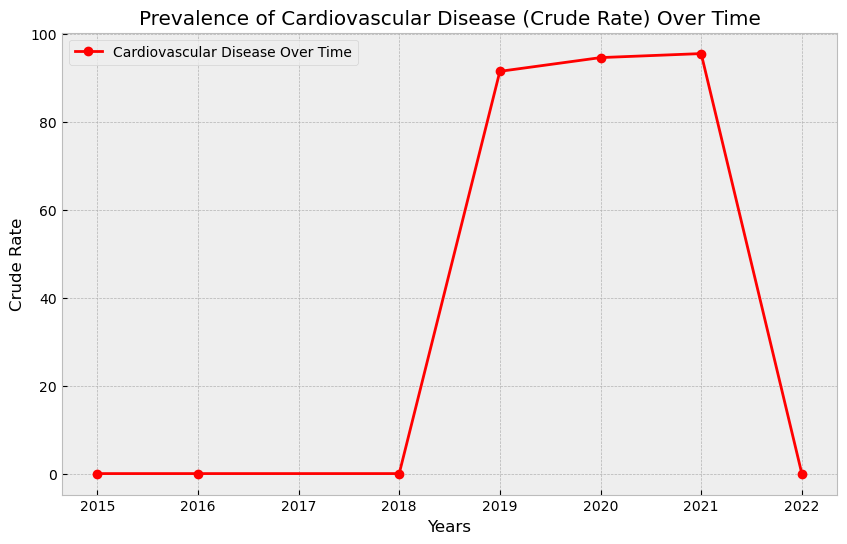

In [95]:
#Plotting the Cardiovascular disease over time 
most_prevelent_disease_df = chronic_pivot_df.xs(most_prevelent_disease, level='Topic')
most_prevelent_disease_crude_rate_df = pd.DataFrame(most_prevelent_disease_df.loc['Crude Rate'])
most_prevelent_disease_crude_rate_df
plt.figure(figsize=(10, 6))
plt.plot(most_prevelent_disease_crude_rate_df.index, most_prevelent_disease_crude_rate_df['Crude Rate'],label='Cardiovascular Disease Over Time', color='red', marker='o', linestyle='-')
plt.title('Prevalence of Cardiovascular Disease (Crude Rate) Over Time')
plt.legend() 
plt.xlabel('Years')
plt.ylabel('Crude Rate')
plt.grid(True)
plt.savefig("Images/Fig3.png") # Saves Graph to a PNG File
plt.show()


In [101]:
#Dataframe with States adding DataValueType -> Crude Rate
us_chronic_cruderate = us_chronic_df.loc[(us_chronic_df["DataValueType"] == "Crude Rate"),:]
#Resetting index
us_chronic_cruderate_df = us_chronic_cruderate.reset_index(drop=True)
#filing the datframe with 0 instead of NaN
us_chronic_cruderate_df.dropna(subset=['DataValue'], inplace=True)
#Displaying dataframe
us_chronic_cruderate_df.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2015,CO,Colorado,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-106.13361092099967 38.843840757000464)
1,2016,ID,Idaho,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Sex,Male,POINT (-114.3637300419997 43.682630005000476)
2,2015,TX,Texas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,234.0,234.0,NaN,NaN,230.5,237.5,Race/Ethnicity,"Asian or Pacific Islander, non-Hispanic",POINT (-99.42677020599967 31.827240407000488)
3,2015,NC,North Carolina,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Sex,Female,POINT (-79.15925046299964 35.466220975000454)
4,2016,LA,Louisiana,US Cancer DVT,Cancer,Lung and bronchial cancer mortality among all ...,"per 100,000",Crude Rate,44.4,44.4,NaN,NaN,42.9,45.9,Race/Ethnicity,"Black, non-Hispanic",POINT (-92.44568007099969 31.31266064400046)


In [102]:
#Filtering the data to only show cardiovascular disease as topic
us_chronic_cruderate_df = us_chronic_df.loc[(us_chronic_df["DataValueType"] == "Crude Rate") & (us_chronic_df["Topic"] == "Cardiovascular Disease"), :]
# Resetting index
us_chronic_cruderate_index = us_chronic_cruderate_df.reset_index(drop=True)
# Filling NaN with 0
us_chronic_cruderate_index.fillna(0, inplace=True)
# Sorting the dataframe by the most prevalent disease per region
us_chronic_cruderate_index.sort_values("DataValue", ascending=True, inplace=True)
# Displaying dataframe
us_chronic_cruderate_index.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-111.76381127699972 34.865970280000454)
6627,2021,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
1759,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
6628,2021,SC,South Carolina,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
5993,2021,NH,New Hampshire,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-71.50036091999965 43.65595011300047)


In [104]:
#Dataframe filtered by Race/Ethnicity
us_chronic_ethnicity= us_chronic_cruderate_index[us_chronic_cruderate_index['StratificationCategory1']== 'Race/Ethnicity']
us_chronic_ethnicity.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2019,AZ,Arizona,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-111.76381127699972 34.865970280000454)
6627,2021,RI,Rhode Island,NVSS,Cardiovascular Disease,Cerebrovascular disease (stroke) mortality amo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",POINT (-71.52247031399963 41.70828019300046)
1759,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
6628,2021,SC,South Carolina,NVSS,Cardiovascular Disease,Coronary heart disease mortality among all peo...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
5993,2021,NH,New Hampshire,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-71.50036091999965 43.65595011300047)


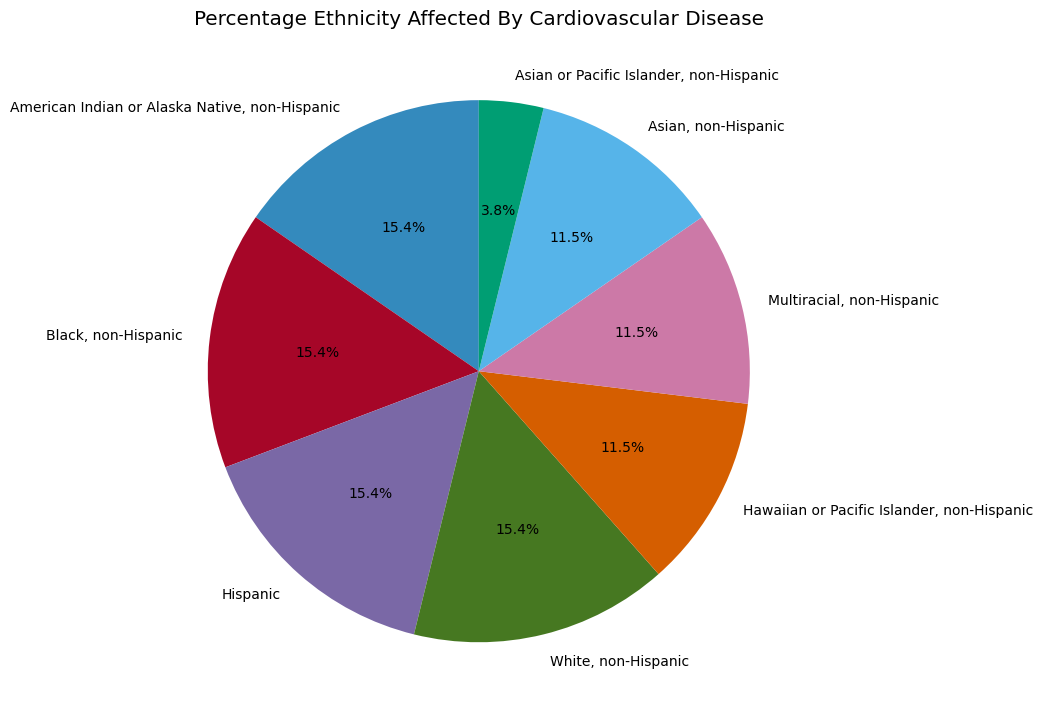

In [106]:
#Pie chart Of ethnicity affected by cardiovascular disease
ethnicity_cardiopie= us_chronic_ethnicity['Stratification1'].value_counts()
plt.figure(figsize=(8.8,8.8))
ethnicity_cardiopie.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Ethnicity Affected By Cardiovascular Disease')
plt.ylabel('')
#plt.savefig()
plt.show()

In [109]:
# Counting each unique value in the 'Question' column
question_counts = us_chronic_ethnicity['Question'].value_counts()

# Filtering the DataFrame by hospitalizations for 65 years old and over.	
hopitalization_agedover65=us_chronic_ethnicity[us_chronic_ethnicity['Question']=='Hospitalization for heart failure as principal diagnosis, Medicare-beneficiaries aged 65 years and older']
hopitalization_agedover65.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
1759,2019,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-81.04537120699968 33.998821303000454)
1751,2019,SD,South Dakota,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,"Black, non-Hispanic",POINT (-100.3735306369997 44.353130053000484)
4367,2020,VT,Vermont,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,Hispanic,POINT (-72.51764079099962 43.62538123900049)
4286,2020,SD,South Dakota,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,Hispanic,POINT (-100.3735306369997 44.353130053000484)
4292,2020,SC,South Carolina,CMS Part A Claims Data,Cardiovascular Disease,Hospitalization for heart failure as principal...,"cases per 1,000",Crude Rate,0.0,0.0,~,Data suppressed; too few respondents or cases,0.0,0.0,Race/Ethnicity,Hispanic,POINT (-81.04537120699968 33.998821303000454)


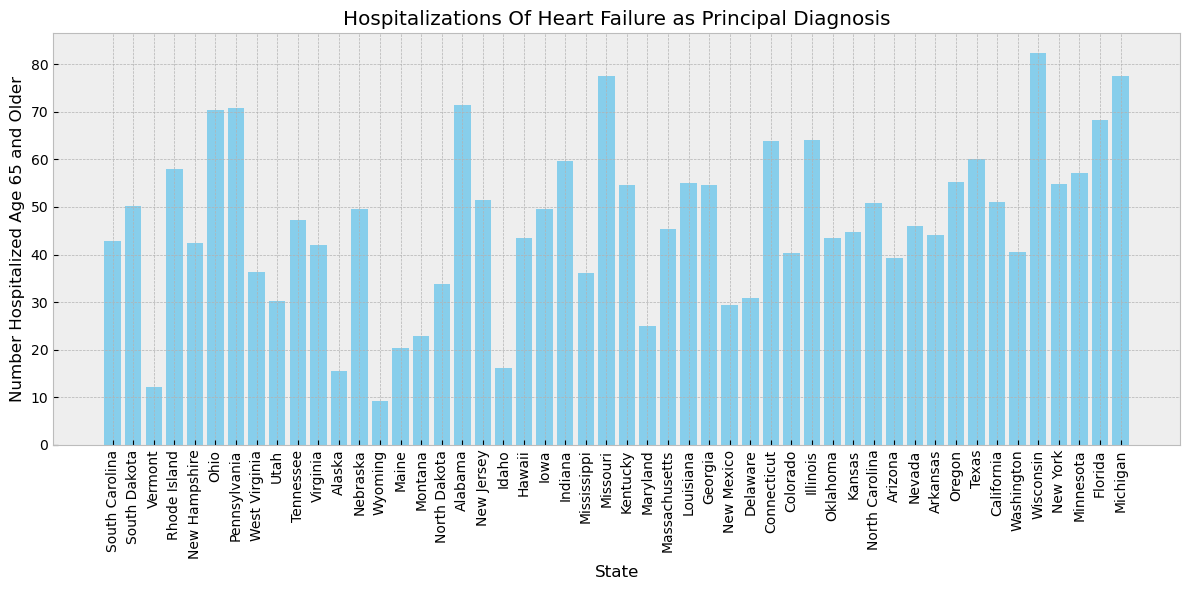

In [111]:
#The hospitalizations for heart failure for 65 and older
locations = hopitalization_agedover65['Location']
hopitalization_rate = hopitalization_agedover65['DataValue']

plt.figure(figsize=(12, 6))
plt.bar(locations, hopitalization_rate, color='skyblue')
plt.xlabel('State')
plt.ylabel('Number Hospitalized Age 65 and Older')
plt.title('Hospitalizations Of Heart Failure as Principal Diagnosis')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#Part 4: In which geographic regions or areas are chronic diseases most and least prevalent?

In [31]:
#Dataframe with States adding DataValueType -> Crude Rate
us_chronic_cruderate = us_chronic_df.loc[(us_chronic_df["DataValueType"] == "Crude Rate"),:]
#Resetting index
us_chronic_cruderate_df = us_chronic_cruderate.reset_index(drop=True)
#filing the datframe with 0 instead of NaN
us_chronic_cruderate_df.dropna(subset=['DataValue'], inplace=True)
#Displaying dataframe
us_chronic_cruderate_df.head()

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
0,2015,CO,Colorado,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",POINT (-106.13361092099967 38.843840757000464)
1,2016,ID,Idaho,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Sex,Male,POINT (-114.3637300419997 43.682630005000476)
2,2015,TX,Texas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence","per 100,000",Crude Rate,234.0,234.0,NaN,NaN,230.5,237.5,Race/Ethnicity,"Asian or Pacific Islander, non-Hispanic",POINT (-99.42677020599967 31.827240407000488)
3,2015,NC,North Carolina,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...","per 100,000",Crude Rate,0.0,NaN,~,Data suppressed; too few respondents or cases,NaN,NaN,Sex,Female,POINT (-79.15925046299964 35.466220975000454)
4,2016,LA,Louisiana,US Cancer DVT,Cancer,Lung and bronchial cancer mortality among all ...,"per 100,000",Crude Rate,44.4,44.4,NaN,NaN,42.9,45.9,Race/Ethnicity,"Black, non-Hispanic",POINT (-92.44568007099969 31.31266064400046)


In [32]:
most_prevalent_disease_per_state = us_chronic_cruderate_df.sort_values("DataValue",ascending=False)
most_prevalent_disease_per_state.head(5)

,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
23909,2021,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1456.5,1456.5,NaN,NaN,1427.0,1485.9,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)
17565,2020,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1394.5,1394.5,NaN,NaN,1365.8,1423.1,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)
11238,2019,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1329.2,1329.2,NaN,NaN,1300.8,1357.5,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)
23314,2021,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1284.2,1284.2,NaN,NaN,1252.6,1315.8,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)
15905,2020,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1283.3,1283.3,NaN,NaN,1251.9,1314.7,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)


In [33]:
least_prevalent_disease_per_state = us_chronic_cruderate_df.sort_values("DataValue", ascending=True)
least_prevalent_disease_per_state = least_prevalent_disease_per_state[least_prevalent_disease_per_state["DataValue"] != 0]
least_prevalent_disease_per_state



,Years,LocationAbbr,Location,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation
11760,2019,TX,Texas,NVSS,Asthma,"Asthma mortality among all people, underlying ...","cases per 100,000",Crude Rate,0.2,0.2,NaN,NaN,0.1,0.3,Race/Ethnicity,Hispanic,POINT (-99.42677020599967 31.827240407000488)
23497,2021,NC,North Carolina,NVSS,Asthma,"Asthma mortality among all people, underlying ...","cases per 100,000",Crude Rate,0.3,0.3,NaN,NaN,0.2,0.5,Age,Age 0-44,POINT (-79.15925046299964 35.466220975000454)
11545,2019,TX,Texas,NVSS,Asthma,"Asthma mortality among all people, underlying ...","cases per 100,000",Crude Rate,0.3,0.3,NaN,NaN,0.3,0.4,Age,Age 0-44,POINT (-99.42677020599967 31.827240407000488)
18525,2020,TX,Texas,NVSS,Asthma,"Asthma mortality among all people, underlying ...","cases per 100,000",Crude Rate,0.3,0.3,NaN,NaN,0.2,0.4,Race/Ethnicity,Hispanic,POINT (-99.42677020599967 31.827240407000488)
6492,2019,CA,California,NVSS,Asthma,"Asthma mortality among all people, underlying ...","cases per 100,000",Crude Rate,0.3,0.3,NaN,NaN,0.2,0.4,Age,Age 0-44,POINT (-120.99999953799971 37.63864012300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,2020,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1283.3,1283.3,NaN,NaN,1251.9,1314.7,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)
23314,2021,MS,Mississippi,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1284.2,1284.2,NaN,NaN,1252.6,1315.8,Age,Age >=65,POINT (-89.53803082499968 32.745510099000455)
11238,2019,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1329.2,1329.2,NaN,NaN,1300.8,1357.5,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)
17565,2020,OK,Oklahoma,NVSS,Cardiovascular Disease,Diseases of the heart mortality among all peop...,"cases per 100,000",Crude Rate,1394.5,1394.5,NaN,NaN,1365.8,1423.1,Age,Age >=65,POINT (-97.52107021399968 35.47203135600046)


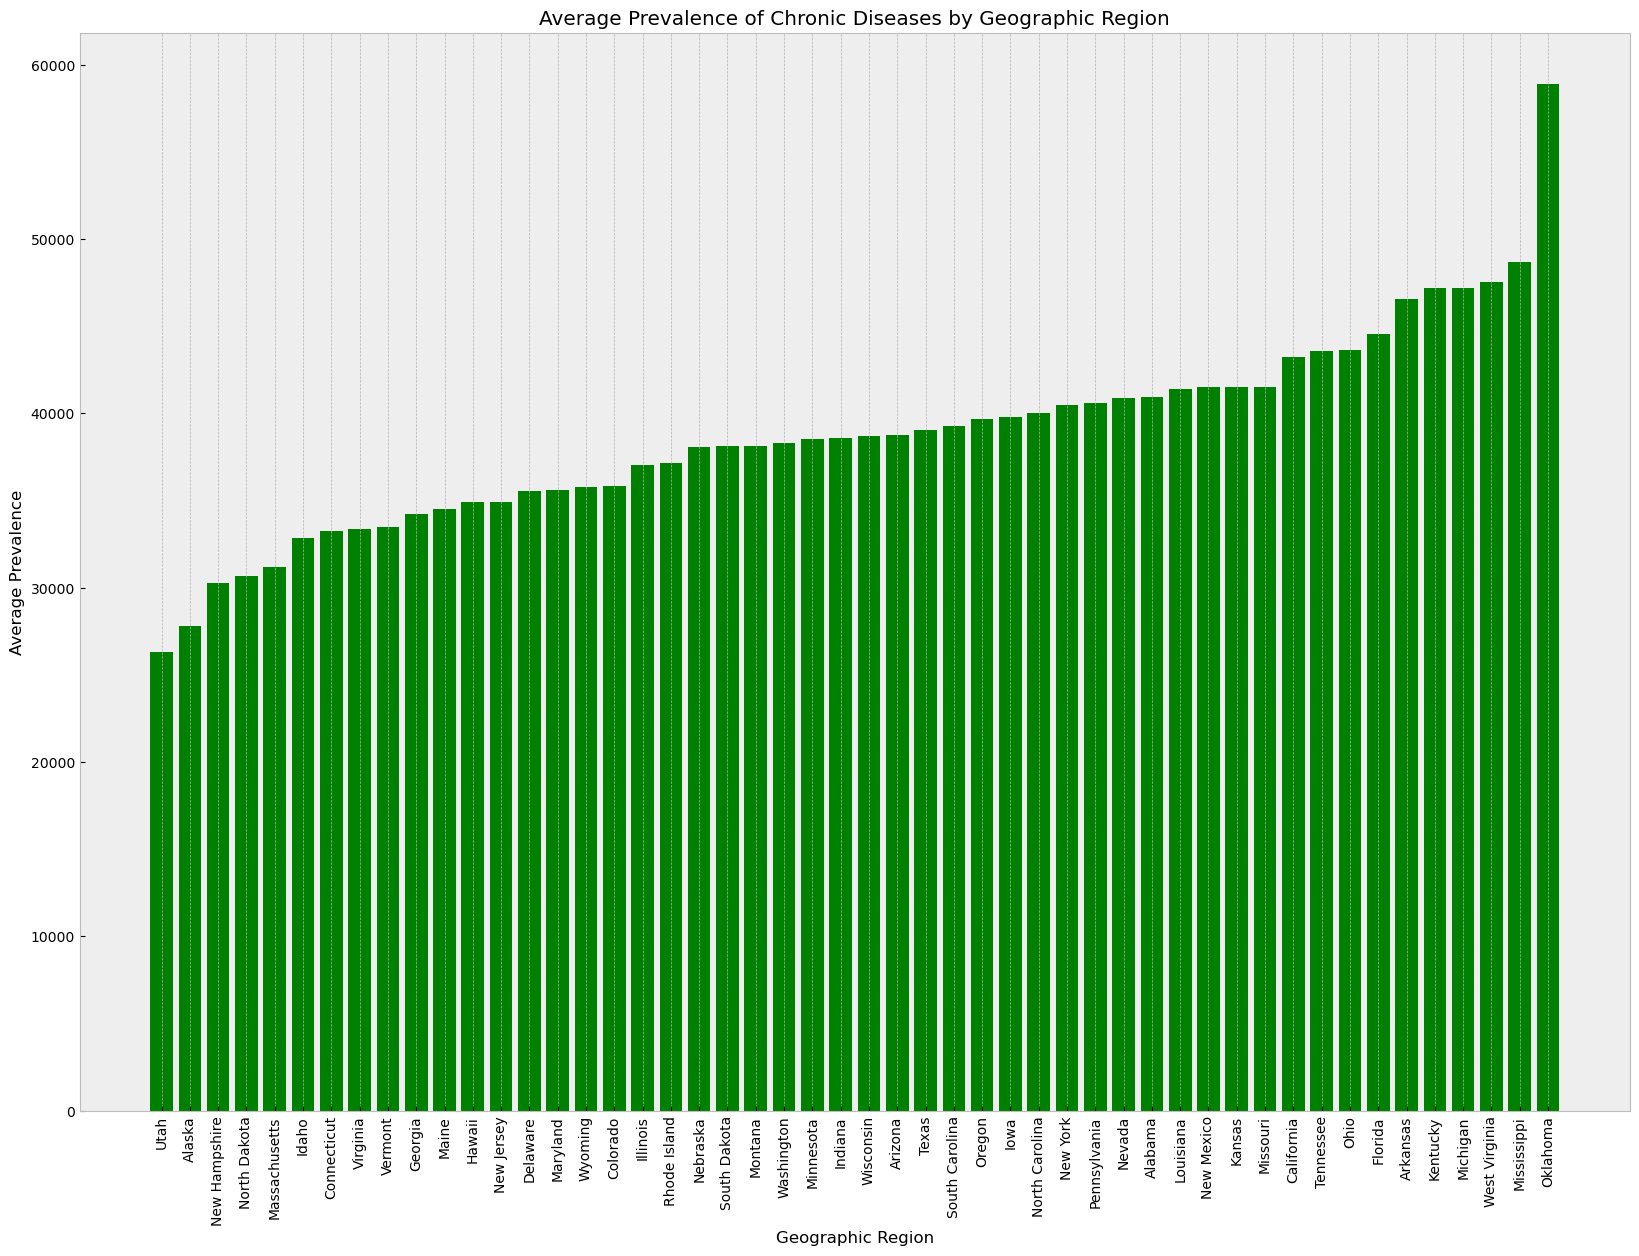

In [80]:
# Group data by location and calculate average prevalence across all chronic diseases
prevalence_by_location = us_chronic_cruderate_df.groupby('Location')['DataValueAlt'].sum().reset_index()

# Sort data by prevalence for better visualization
prevalence_by_location = prevalence_by_location.sort_values(by='DataValueAlt')

# Plot the bar graph
plt.figure(figsize=(20, 14))
plt.bar(prevalence_by_location['Location'], prevalence_by_location['DataValueAlt'], color='green')
plt.title('Average Prevalence of Chronic Diseases by Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Average Prevalence')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("Images/Fig4.png") # Saves Graph to a PNG File
plt.show()

#Part 5: Is there a difference between men and women in the prevalence of chronic diseases, and what relationships and correlations exist with certain diseases?

In [35]:
# Count of Females of Data Set with Chronic Disease,
#we're using the least_prevalent_disease_per_state because that dataframe doesn't have the rows with 0 and here we're using the value_counts function.
female_count = least_prevalent_disease_per_state['Stratification1'].value_counts()['Female']
# Displaying Count of Females with Chronic Diseases
female_count

2303

In [36]:
# Count of Males of Data Set with Chronic Disease
male_count = least_prevalent_disease_per_state['Stratification1'].value_counts()['Male']
# Displaying Count of Males with Chronic Diseases
male_count

2196

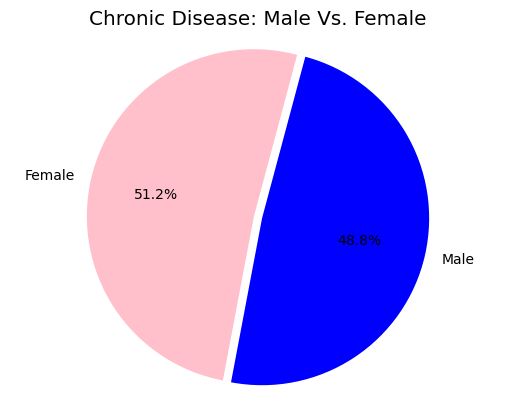

In [37]:
sizes = [female_count, male_count] # Count of Males and Females
labels = ['Female', 'Male'] # Labels Printed on Pie Chart
colors = [ 'pink', 'blue'] # Colors for the Pie chart 
explode = (0.05, 0) # Pushing out Larger Portion to Show Difference
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle = 75) # Setting Up and Coding for Pie Graph
plt.axis('equal')  # Ensures that the Pie Graph is a Circle
plt.title("Chronic Disease: Male Vs. Female") # Title of Pie Graph
plt.savefig("Images/Fig5.png") # Saves Graph to a PNG File
plt.show() # Displaying the Finished Pie Graph

#Part 6: ocurrence of chronic disease per most and least prevalent states in regards to male and female

In [38]:
# Making New DataFrame to Show Male vs. Female Per State and Disease Relevance
male_female_df = least_prevalent_disease_per_state[['Topic', 'DataValue','Stratification1', 'Location']]
# Displaying DataFrame
male_female_df

,Topic,DataValue,Stratification1,Location
11760,Asthma,0.2,Hispanic,Texas
23497,Asthma,0.3,Age 0-44,North Carolina
11545,Asthma,0.3,Age 0-44,Texas
18525,Asthma,0.3,Hispanic,Texas
6492,Asthma,0.3,Age 0-44,California
...,...,...,...,...
15905,Cardiovascular Disease,1283.3,Age >=65,Mississippi
23314,Cardiovascular Disease,1284.2,Age >=65,Mississippi
11238,Cardiovascular Disease,1329.2,Age >=65,Oklahoma
17565,Cardiovascular Disease,1394.5,Age >=65,Oklahoma


In [39]:
# Getting the Mean Values of Oklahoma Prevalance Rate
wv_values = least_prevalent_disease_per_state[least_prevalent_disease_per_state['Location'] == "Oklahoma"]['DataValue'].sum()
# Displaying the West Virgina Prevalance Rate
print(wv_values)

58890.659999999996


In [40]:
# Getting the Mean Values of Utah Prevalance Rate
ut_values = least_prevalent_disease_per_state[least_prevalent_disease_per_state['Location'] == "Utah"]['DataValue'].sum()
# Displaying the Utah Prevalance Rate
print(ut_values)

26305.460000000003


In [41]:
# Getting the Data for Females in Oklahoma with Chronic Cardiovascular Diseases
oklahoma_cardiovascular_disease_femele = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Cardiovascular Disease")]
# Displays Data Frame for Females in Oklahoma with Chronic Cardiovascular Diseases
oklahoma_cardiovascular_disease_femele = oklahoma_cardiovascular_disease_femele.shape[0]
# Display the Total Number of the Data Frame
oklahoma_cardiovascular_disease_femele


12

In [42]:
# Getting the Data for Females in Oklahoma with Chronic Obstructive Pulmonary Diseases
oklahoma_pulmonary_disease_female = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Chronic Obstructive Pulmonary Disease")]
# Displays Data Frame for Females in Oklahoma with Chronic Obstructive Pulmonary Diseases
oklahoma_pulmonary_disease_female = oklahoma_pulmonary_disease_female.shape[0]
# Display the Total Number of the Data Frame
oklahoma_pulmonary_disease_female

12

In [43]:
# Getting the Data for Females in Oklahoma with Cancer
oklahoma_cancer_disease_female = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Cancer")]
# Displays Data Frame for Females in Oklahoma with Cancer
oklahoma_cancer_disease_female = oklahoma_cancer_disease_female.shape[0]
# Display the Total Number of the Data Frame
oklahoma_cancer_disease_female

12

In [44]:
# Getting the Data for Females in Oklahoma with Diabetes
oklahoma_diabetes_disease_female = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Diabetes")]
# Displays Data Frame for Females in Oklahoma with Diabetes
oklahoma_diabetes_disease_female = oklahoma_diabetes_disease_female.shape[0]
# Display the Total Number of the Data Frame
oklahoma_diabetes_disease_female


6

In [45]:
# Getting the Data for Females in Oklahoma with Alcohol Related Chronic Diseases
oklahoma_alcohol_disease_female = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Alcohol")]
# Displays Data Frame for Females in Oklahoma with Alcohol Related Chronic Diseases
oklahoma_alcohol_disease_female = oklahoma_alcohol_disease_female.shape[0]
# Display the Total Number of the Data Frame
oklahoma_alcohol_disease_female

3

In [46]:
# Getting the Data for Females in Oklahoma with Chronic Asthma
oklahoma_asthma_disease_female = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Asthma")]
# Displays Data Frame for Females in Oklahoma with Chronic Asthma
oklahoma_asthma_disease_female = oklahoma_asthma_disease_female.shape[0]
# Display the Total Number of the Data Frame
oklahoma_asthma_disease_female

3

##males

In [47]:
# Getting the Data for Males in Oklahoma with Chronic Cardiovascular Diseases
oklahoma_cardiovascular_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Cardiovascular Disease")]
# Displays Data Frame for Males in Oklahoma with Chronic Cardiovascular Diseases
oklahoma_cardiovascular_disease_male = oklahoma_cardiovascular_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_cardiovascular_disease_male

12

In [48]:
# Getting the Data for Males in Oklahoma with Chronic Obstructive Pulmonary Diseases
oklahoma_pulmonary_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Chronic Obstructive Pulmonary Disease")]
# Displays Data Frame for Males in Oklahoma with Chronic Obstructibe Pulmonary Diseases
oklahoma_pulmonary_disease_male = oklahoma_pulmonary_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_pulmonary_disease_male

12

In [49]:
# Getting the Data for Males in Oklahoma with Cancer
oklahoma_cancer_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Cancer")]
# Displays Data Frame for Males in Oklahoma with Cancer
oklahoma_cancer_disease_male = oklahoma_cancer_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_cancer_disease_male

10

In [50]:
# Getting the Data for Males in Oklahoma with Diabetes
oklahoma_diabetes_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Diabetes")]
# Displays Data Frame for Males in Oklahoma with Diabetes
oklahoma_diabetes_disease_male = oklahoma_diabetes_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_diabetes_disease_male

6

In [51]:
# Getting the Data for Males in Oklahoma with Alcohol Related Chronic Diseases
oklahoma_alcohol_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Alcohol")]
# Displays Data Frame for Males in Oklahoma with Alcohol Related Chronic Diseases
oklahoma_alcohol_disease_male = oklahoma_alcohol_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_alcohol_disease_male

3

In [52]:
# Getting the Data for Males in Oklahoma with Chronic Asthma
oklahoma_asthma_disease_male = male_female_df[(male_female_df['Location'] == 'Oklahoma') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Asthma")]
# Displays Data Frame for Males in Oklahoma with Chronic Asthma
oklahoma_asthma_disease_male = oklahoma_asthma_disease_male.shape[0]
# Display the Total Number of the Data Frame
oklahoma_asthma_disease_male

1

#Utah

In [53]:
# Getting the Data for Females in Utah with Chronic Cardiovascular Diseases
utah_cardiovascular_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Cardiovascular Disease")]
# Displays Data Frame for Females in Utah with Chronic Cardiovascular Diseases
utah_cardiovascular_disease_female = utah_cardiovascular_disease_female.shape[0]
# Display the Total Number of the Data Frame
utah_cardiovascular_disease_female

12

In [54]:
# Getting the Data for Females in Utah with Chronic Obstructive Pulmonary Diseases
utah_pulmonary_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Chronic Obstructive Pulmonary Disease")]
# Displays Data Frame for Females in Utah with Chronic Obstructive Pulmonary Diseases
utah_pulmonary_disease_female = utah_pulmonary_disease_female.shape[0]
# Display the Total Number of the Data Frame
utah_pulmonary_disease_female

12

In [55]:
# Getting the Data for Females in Utah with Cancer
utah_cancer_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Cancer")]
# Displays Data Frame for Females in Utah with Cancer
utah_cancer_disease_female = utah_cancer_disease_female.shape[0]
# Display the Total Number of the Data Frame
utah_cancer_disease_female

12

In [56]:
# Getting the Data for Females in Utah with Diabetes
utah_diabetes_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Diabetes")]
# Displays Data Frame for Females in Utah with Diabetes
utah_diabetes_disease_female = utah_diabetes_disease_female.shape[0]
# Display the Total Number of the Data Frame
utah_diabetes_disease_female

5

In [57]:
# Getting the Data for Females in Utah with Alcohol Related Chronic Diseases
utah_alcohol_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Alcohol")]
# Displays Data Frame for Females in Utah with Alcohol Related Chronic Diseases
utah_alcohol_disease_female = utah_alcohol_disease_female.shape[0]
# Prints the Total Number of the Data Frame
utah_alcohol_disease_female

3

In [58]:
# Getting the Data for Females in Utah with Chronic Asthma
utah_asthma_disease_female = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Female') & (male_female_df['Topic'] == "Asthma")]
# Displays Data Frame for Females in Utah with Chronic Asthma
utah_asthma_disease_female = utah_asthma_disease_female.shape[0]
# Prints the Total Number of the Data Frame
utah_asthma_disease_female

0

#males for Utah

In [59]:
# Getting the Data for Males in Utah with Chronic Cardiovascular Diseases
utah_cardiovascular_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Cardiovascular Disease")]
# Displays Data Frame for Males in Utah with Chronic Cardiovascular Diseases
utah_cardiovascular_disease_male = utah_cardiovascular_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_cardiovascular_disease_male

12

In [60]:
# Getting the Data for Males in Utah with Chronic Obstructive Pulmonary Diseases
utah_pulmonary_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Chronic Obstructive Pulmonary Disease")]
# Displays Data Frame for Males in Utah with Chronic Obstructive Pulmonary Diseases
utah_pulmonary_disease_male = utah_pulmonary_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_pulmonary_disease_male

12

In [61]:
# Getting the Data for Males in Utah with Cancer
utah_cancer_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Cancer")]
# Displays Data Frame for Males in Utah with Cancer
utah_cancer_disease_male = utah_cancer_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_cancer_disease_male

10

In [62]:
# Getting the Data for Males in Utah with Diabetes
utah_diabetes_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Diabetes")]
# Displays Data Frame for Males in Utah with Diabetes
utah_diabetes_disease_male = utah_diabetes_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_diabetes_disease_male

6

In [63]:
# Getting the Data for Males in Utah with Alcohol Related Chronic Diseases
utah_alcohol_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Alcohol")]
# Displays Data Frame for Males in Utah with Alcohol Related Chronic Diseases
utah_alcohol_disease_male = utah_alcohol_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_alcohol_disease_male

3

In [64]:
# Getting the Data for Males in Utah with Chronic Asthma
utah_asthma_disease_male = male_female_df[(male_female_df['Location'] == 'Utah') & (male_female_df['Stratification1'] == 'Male') & (male_female_df['Topic'] == "Asthma")]
# Displays Data Frame for Males in Utah with Chronic Asthma
utah_asthma_disease_male = utah_asthma_disease_male.shape[0]
# Prints the Total Number of the Data Frame
utah_asthma_disease_male

0

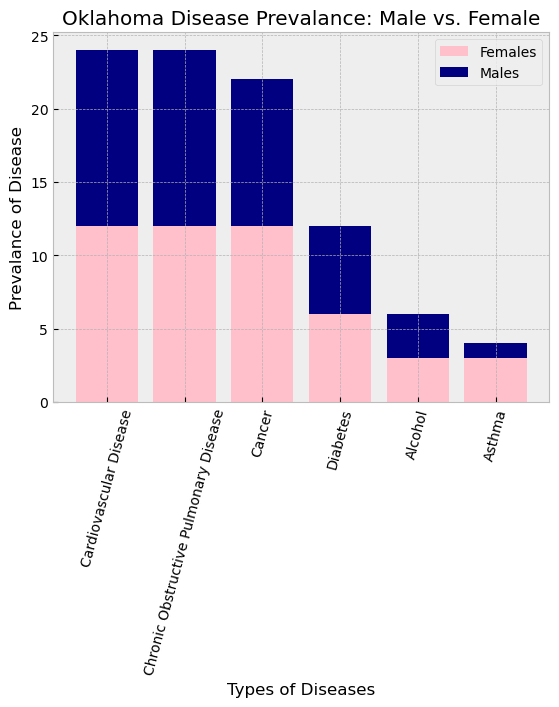

In [88]:
categories = ['Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Cancer', 'Diabetes', 'Alcohol', 'Asthma'] # X-Axis Labels
females = [oklahoma_cardiovascular_disease_femele, oklahoma_pulmonary_disease_female, oklahoma_cancer_disease_female, oklahoma_diabetes_disease_female, oklahoma_alcohol_disease_female, oklahoma_asthma_disease_female ] # Data Frame Set for Females in Oklahoma
males = [oklahoma_cardiovascular_disease_male, oklahoma_pulmonary_disease_male, oklahoma_cancer_disease_male, oklahoma_diabetes_disease_male, oklahoma_alcohol_disease_male, oklahoma_asthma_disease_male ] # Data Frame Set for Males in West Oklahoma

# Create stacked bar graph
plt.bar(categories, females, label='Females', color = "Pink") # Creates Bar Graph for Females
plt.bar(categories, males, bottom=females, label='Males', color = "Navy") # Creates Bar Graph for Males and Puts Females Bar Graph on the Bottom

# Add labels and legend
# plt.figure(figsize= (10,5))
plt.xlabel('Types of Diseases') # Title of X-Axis
plt.ylabel('Prevalance of Disease') # Title of Y- Axies
plt.title('Oklahoma Disease Prevalance: Male vs. Female') # Title of Graph
plt.xticks(rotation=75) # Sets the Way the Ticks are Written on the X-Axis
plt.legend() # Displays the Legend to Show What is Being Compared
plt.savefig("Images/Fig6.png") # Saves Graph to a PNG File
# Show the plot
plt.show() # Displays the Stacked Bar Graph


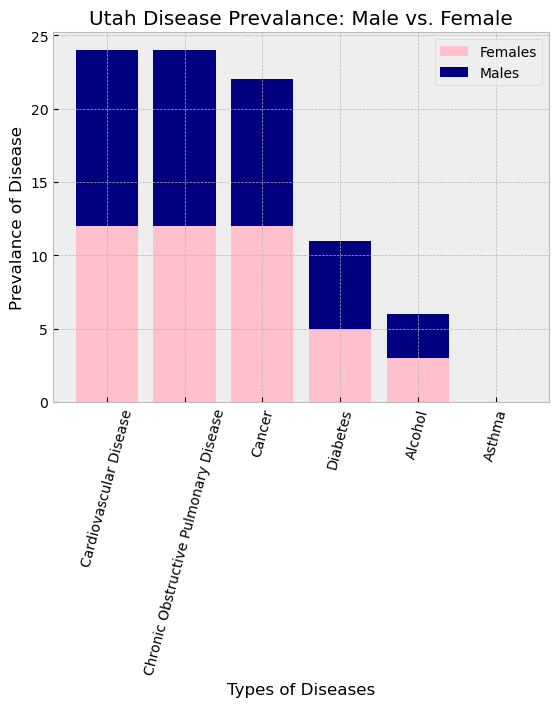

In [67]:
categories = ['Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Cancer', 'Diabetes', 'Alcohol', 'Asthma'] # X-Axis Labels
females = [utah_cardiovascular_disease_female, utah_pulmonary_disease_female, utah_cancer_disease_female, utah_diabetes_disease_female, utah_alcohol_disease_female, utah_asthma_disease_female ] # Data Frame Set for Females in Utah
males = [utah_cardiovascular_disease_male, utah_pulmonary_disease_male, utah_cancer_disease_male, utah_diabetes_disease_male, utah_alcohol_disease_male, utah_asthma_disease_male] # Data Frame Set for Males in Utah

# Create stacked bar graph
plt.bar(categories, females, label='Females', color = "Pink") # Creates Bar Graph for Females
plt.bar(categories, males, bottom=females, label='Males', color = "Navy") # Creates Bar Graph for Males and Puts Females Bar Graph on the Bottom

# Add labels and legend
plt.xlabel('Types of Diseases') # Title of X-Axis
plt.ylabel('Prevalance of Disease') # Title of Y- Axies
plt.title('Utah Disease Prevalance: Male vs. Female') # Title of Graph
plt.xticks(rotation=75) # Sets the Way the Ticks are Written on the X-Axis
plt.legend() # Displays the Legend to Show What is Being Compared
plt.savefig("Images/Fig7.png") # Saves Graph to a PNG File
# Show the plot
plt.show() # Displays the Stacked Bar Graph

In [68]:
#Verifying DataFrame is Correct
least_prevalent_disease_per_state.to_csv("output.csv", index=False)
male_female_df.to_csv("output2.csv", index=False)